0.12.2
df sample mean:
stayid_hw1_stayid       3.494679e+07
sum_urine               1.569360e+03
vaso_itemid             2.223150e+05
stayid_gender_data      3.494679e+07
hemoglobin_min          9.783732e+00
hemoglobin_max          1.094067e+01
resp_rate_mean          2.095397e+01
glucose_max             1.765358e+02
heart_rate_max          1.105722e+02
glucose_avg             1.564470e+02
anchor_age              6.213024e+01
hospital_expire_flag    1.594951e-01
vaso                    9.695927e-02
dtype: float64
df sample standard deviation:
stayid_hw1_stayid       2.917132e+06
sum_urine               1.108049e+03
vaso_itemid             0.000000e+00
stayid_gender_data      2.917132e+06
hemoglobin_min          2.323795e+00
hemoglobin_max          2.169594e+00
resp_rate_mean          4.280107e+00
glucose_max             7.904444e+01
heart_rate_max          2.137260e+01
glucose_avg             6.388123e+01
anchor_age              1.679579e+01
hospital_expire_flag    3.662422e-01
vaso   

C:\Users\User\anaconda3\envs\data_processing\Lib\site-packages\scipy\stats\_morestats.py:3189: RuntimeWarning: invalid value encountered in scalar divide
  W = numer / denom
C:\Users\User\anaconda3\envs\data_processing\Lib\site-packages\scipy\stats\_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


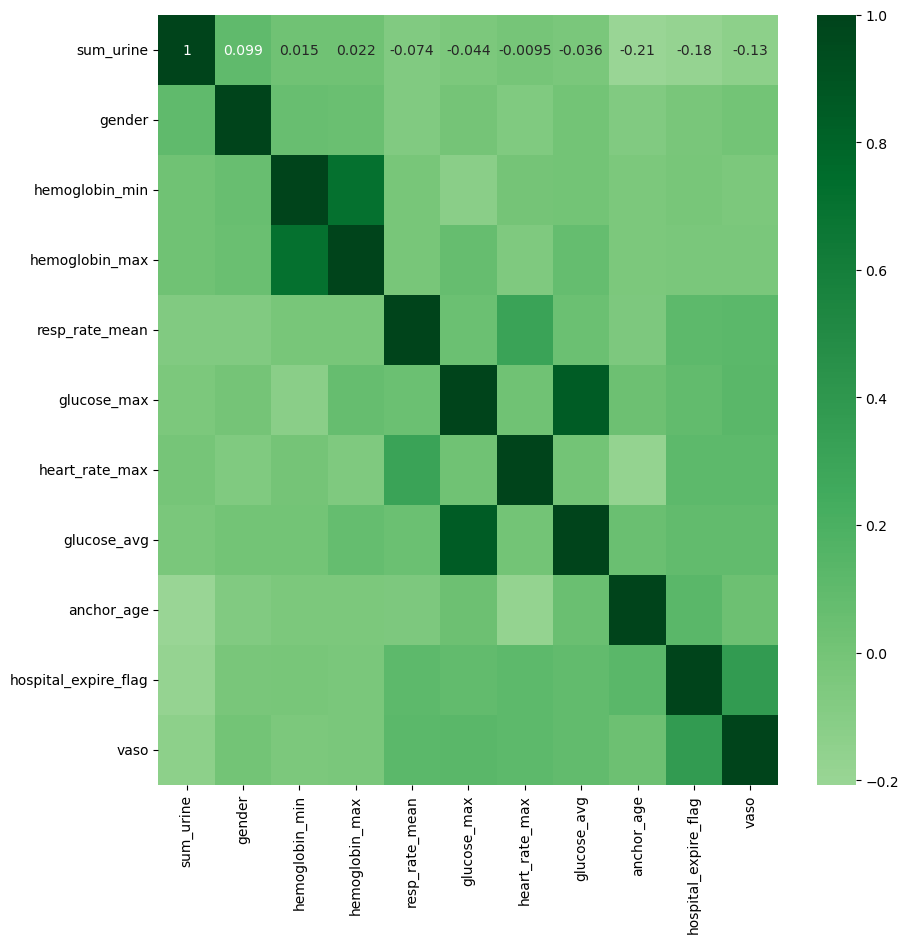

In [57]:
import pandas as pd
from scipy import stats 
import seaborn as sns
import matplotlib.pyplot as plt
print(sns.__version__)
df = pd.read_csv('dh_hw2_data1743.csv')
# convert M->1, F->0; Vasopressin: have use->10, have not use->0
def gender_map(x):
    gender = 1 if x == 'M' else 0
    return gender
def vaso_map(x):
    vaso = 1 if x == 222315 else 0
    return vaso
    
df['gender'] = df['gender'].map(gender_map) 
df['vaso'] = df['vaso_itemid'].map(vaso_map)

df_die_in_hospital = df.loc[df['hospital_expire_flag']==1] # 1:died
df_not_die_in_hospital = df.loc[df['hospital_expire_flag']==0] # 0:alive
# for not preprocessing-> df
# before compute p-value, need to drop nan
# for after preprocessing->df2 # missing data, outliers
def outlier_to_mean(x, mean, lb, ub):
    col = mean if ((x < lb) or (ub < x)) else x
    return col
df2 = df.copy() # .copy()->df and df2 are different; df2=df->df and df2 are same.
for column in df:
    if ((column!='hospital_expire_flag') and (column!='vaso_itemid') and (column!='stayid_gender_data') and (column!='stayid_hw1_stayid')and (column!='gender')):
        col_mean = df2[column].mean()
        col_q1 = df2[column].quantile(0.25)
        col_q3 = df2[column].quantile(0.75)
        IQR = col_q3-col_q1
        upper_bound = col_q3+1.5*IQR
        lower_bound = col_q1-1.5*IQR
        # number<col_q1-1.5*IQR or col_q3+1.5*IQR is outlier
        df2[column] = df2[column].map(lambda x:outlier_to_mean(x, col_mean, lower_bound, upper_bound)) # change the outliers to mean

        df2[column].fillna(value=df2[column].median(), inplace=True) # fill in missing data by median of that column

# now, df2 has done: dealing with missing data and outliers.
# difference between df and df2
print("df sample mean:")
print(df.drop('gender', axis=1).mean())
print("df sample standard deviation:")
print(df.drop('gender', axis=1).std())

print("df2 sample mean:")
print(df2.drop('gender', axis=1).mean())
print("df2 sample standard deviation:")
print(df2.drop('gender', axis=1).std())

# compute p-value
# two sample t-Test is to know whether or not two group of people(people died in hospital, people not died in hospital) have the same mean.
for column in df:
    if column=='gender': continue
    A = df_die_in_hospital[column].dropna(axis=0)
    B = df_not_die_in_hospital[column].dropna(axis=0)

    # check whether the sample have the same variance, alpha=0.05
    statistic, sigma_p_value = stats.levene(A, B)
    if(sigma_p_value>=0.05): # have same variance
        t_statistic, p_value = stats.ttest_ind(A, B, equal_var=True, alternative='two-sided')
    else: # not have same variance
        t_statistic, p_value = stats.ttest_ind(A, B, equal_var=False, alternative='two-sided')
    print(column,'\n', t_statistic, "p-value ->", p_value)


print(df.isna().sum())
print(df2.isna().sum())

# Feature Relevance Analysis
df3 = df2.copy()
# use df3 (preprocessing data)
df3.drop(['stayid_hw1_stayid', 'vaso_itemid', 'stayid_gender_data'], axis=1, inplace=True)
df3_corr = df3.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(df3_corr, cmap='Greens', annot=True, center=0)
plt.show()

In [58]:
df

,stayid_hw1_stayid,sum_urine,vaso_itemid,stayid_gender_data,gender,hemoglobin_min,hemoglobin_max,resp_rate_mean,glucose_max,heart_rate_max,glucose_avg,anchor_age,hospital_expire_flag,vaso
0,35281441,1340.0,NaN,35281441,1,NaN,NaN,NaN,NaN,77.0,NaN,68,0,0
1,31308108,1500.0,NaN,31308108,0,NaN,NaN,16.782609,NaN,87.0,NaN,52,0,0
2,36878966,500.0,NaN,36878966,1,NaN,NaN,23.285714,NaN,90.0,NaN,68,0,0
3,39326097,NaN,NaN,39326097,0,NaN,NaN,17.750000,NaN,112.0,NaN,28,0,0
4,33063599,695.0,NaN,33063599,0,10.2,10.4,18.173913,194.0,81.0,188.0,27,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1738,36379582,517.0,222315.0,36379582,1,11.3,11.3,18.907407,251.0,91.0,251.0,75,1,1
1739,30187303,1858.0,NaN,30187303,0,11.9,15.7,14.098039,165.0,93.0,145.2,70,0,0
1740,32333312,2275.0,NaN,32333312,1,NaN,NaN,25.969697,NaN,140.0,NaN,66,0,0
1741,36522977,250.0,NaN,36522977,0,NaN,NaN,21.210526,NaN,82.0,NaN,73,0,0
